In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import math

C:\Users\Aurian\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
crimedf = pd.read_csv(r"C:\Users\Aurian\Documents\SMU_LAB_ML1\NewYorkCityCrimes2015\Data\NYPD_Complaint_Data_Historic\NYPD_Complaint_Data_Historic.csv")
crimedf.head(5)

C:\Users\Aurian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [3]:
#Helper Functions

def combineDateTime(Date,Time):
    
    try:
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
            Date = month+'/'+day+'/'+year
        
        datetime(int(year),int(month),int(day)) #this checks if it's a proper date format
        
        myDateTime = str(Date)+' '+str(Time)
        datetime.strptime(myDateTime, "%m/%d/%Y %H:%M:%S")
    except:
        myDateTime = None
        
    return myDateTime

def getHours(fromDateTime, toDateTime):
    dateDiff = None
    
    try:
        if (fromDateTime !=None) & (toDateTime != None):
            start = datetime.strptime(fromDateTime, "%m/%d/%Y %H:%M:%S")
            end = datetime.strptime(toDateTime, "%m/%d/%Y %H:%M:%S")
            dateDiff = end - start
            dateDiff = dateDiff.seconds
            dateDiff = math.ceil(dateDiff/60/60)
    except:
        dateDiff = None
    
    return dateDiff

def getDaysBtwnDates(fromDate, toDate):
    dateDiff = None
    
    try: 
        month1,day1,year1 = str(fromDate).split('/')
        month2,day2,year2 = str(toDate).split('/')
        start = date(int(year1),int(month1),int(day1))
        end = date(int(year2),int(month2),int(day2))
        dateDiff = end - start
        dateDiff = dateDiff.days
            
    except:
        dateDiff = None
    
    return dateDiff

def getSeason(Date):
    season = None
    try:
        #strip month out
        month,day,year = str(Date).split('/')
        #define seasons by month
        Winter = [12,1,2]
        Spring = [3,4,5]
        Summer = [6,7,8]
        Fall = [9,10,11]
        
        if Winter.count(int(month)) == 1:
            season = 'Winter'
        elif Spring.count(int(month)) == 1:
            season = 'Spring'
        elif Summer.count(int(month)) == 1:
            season = 'Summer'
        elif Fall.count(int(month)) == 1:
            season = 'Fall'
    except:
        season = None
    
    return season

def getDayTime(Time):
    daytime = None
    
    try:
        hour,minute,second = str(Time).split(':')
        val = int(str(hour)+str(minute)) #convert into a number
        
        #evaluate the resulting value to determine day time
        if (val>=600)&(val<1200):
            daytime = 'Morning'
        elif (val>=1200)&(val<1700):
            daytime = 'Afternoon'
        elif (val>=1700)&(val<=2000):
            daytime = 'Evening'
        elif (val>2000)&(val<=2400):
            daytime = 'Night'
        elif (val>=100)&(val<600):
            daytime = 'Night'
    except:
        daytime = None
    
    return daytime

def getMonth(Date):
    val = None
    try:
        #strip month out
        month,day,year = str(Date).split('/')
        #mo = month
        dto = datetime.strptime(month,"%m")
        val = dto.strftime("%B") #date(1900, mo, 1).strftime('%B')

    except:
        val = None
    
    return val

def getDay(Date):
    val = None
    try:
        #strip day out
        month,day,year = str(Date).split('/')

        val = int(day)

    except:
        val = None
    
    return val

def getDayName(Date):
    val = None
    try:
        if (Date != None):

            dto = datetime.strptime(str(Date), "%Y-%m-%d %H:%M:%S")
            val = dto.strftime("%A")
        
    except:
        val = None
    
    return val

def getYear(Date):
    val = None
    try:
        #strip year out
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
   
        val = int(year)

    except:
        val = None
    
    return val

def cleanDate(Date):
    newDate = None
    try:
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
            newDate = str(month)+'/'+str(day)+'/'+str(year)
        else:
            newDate = str(month)+'/'+str(day)+'/'+str(year)

    except:
        newDate = None
        
    return newDate

In [4]:
crimedf['CMPLNT_FR_DT'] = crimedf.apply(lambda x: cleanDate(x['CMPLNT_FR_DT']),axis=1)

In [5]:
crimedf['CMPLNT_TO_DT'] = crimedf.apply(lambda x: cleanDate(x['CMPLNT_TO_DT']),axis=1)

In [6]:
crimedf['Start_Dt_Tm'] = crimedf.apply(lambda x: combineDateTime(x['CMPLNT_FR_DT'],x['CMPLNT_FR_TM']),axis=1)

In [7]:
crimedf['End_Dt_Tm'] = crimedf.apply(lambda x: combineDateTime(x['CMPLNT_TO_DT'],x['CMPLNT_TO_TM']),axis=1)

In [8]:
crimedf['Day_Name'] = crimedf.apply(lambda x: getDayName(x['Start_Dt_Tm']),axis=1)

In [9]:
crimedf['Duration'] = crimedf.apply(lambda x: getHours(x['Start_Dt_Tm'],x['End_Dt_Tm']),axis=1)

In [10]:
crimedf['Duration_to_PD'] = crimedf.apply(lambda x: getDaysBtwnDates(x['CMPLNT_FR_DT'],x['RPT_DT']),axis=1)

In [11]:
crimedf['Month'] = crimedf.apply(lambda x: getMonth(x['CMPLNT_FR_DT']),axis=1)

In [12]:
crimedf['Day'] = crimedf.apply(lambda x: getDay(x['CMPLNT_FR_DT']),axis=1)

In [13]:
crimedf['Year'] = crimedf.apply(lambda x: getYear(x['CMPLNT_FR_DT']),axis=1)

In [14]:
#Cut duration into bins (short, medium and long)
crimedf['Duration_lbl'] = pd.cut(x=crimedf['Duration'], bins=[1,8,16,26], labels=['Short', 'Medium', 'Long'], right=False)

In [15]:
#cut start time into seasonal bins
crimedf['Season'] = crimedf.apply(lambda x: getSeason(x['CMPLNT_FR_DT']),axis=1)

In [16]:
#cut start time into daytime bins
crimedf['Daytime'] = crimedf.apply(lambda x: getDayTime(x['CMPLNT_FR_TM']),axis=1)

In [17]:
crimedf['Start_Dt_Tm'] = pd.to_datetime(crimedf['Start_Dt_Tm'])

In [18]:
crimedf['End_Dt_Tm'] = pd.to_datetime(crimedf['End_Dt_Tm'])

In [8]:
crimedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048510 non-null  object 
 2   CMPLNT_FR_TM       1048575 non-null  object 
 3   CMPLNT_TO_DT       842616 non-null   object 
 4   CMPLNT_TO_TM       843002 non-null   object 
 5   RPT_DT             1048575 non-null  object 
 6   KY_CD              1048575 non-null  int64  
 7   OFNS_DESC          1045695 non-null  object 
 8   PD_CD              1047842 non-null  float64
 9   PD_DESC            1047842 non-null  object 
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object 
 11  LAW_CAT_CD         1048575 non-null  object 
 12  JURIS_DESC         1048575 non-null  object 
 13  BORO_NM            1048575 non-null  object 
 14  ADDR_PCT_CD        1048574 non-null  float64
 15  LOC_OF_OCCUR_DESC  830823 non-nu

In [9]:
#Check NA's
crimedf.isna().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT              65
CMPLNT_FR_TM               0
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
RPT_DT                     0
KY_CD                      0
OFNS_DESC               2880
PD_CD                    733
PD_DESC                  733
CRM_ATPT_CPTD_CD           1
LAW_CAT_CD                 0
JURIS_DESC                 0
BORO_NM                    0
ADDR_PCT_CD                1
LOC_OF_OCCUR_DESC     217752
PREM_TYP_DESC           4689
PARKS_NM             1040976
HADEVELOPT            996803
X_COORD_CD             32417
Y_COORD_CD             32417
Latitude               32417
Longitude              32417
Lat_Lon                32417
dtype: int64

In [21]:
#Check different types of offenses committed
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(crimedf.OFNS_DESC.value_counts())

PETIT LARCENY                           180246
HARRASSMENT 2                           133179
ASSAULT 3 & RELATED OFFENSES            114430
CRIMINAL MISCHIEF & RELATED OF          102771
GRAND LARCENY                            96232
DANGEROUS DRUGS                          56868
OFF. AGNST PUB ORD SENSBLTY &            44772
FELONY ASSAULT                           43921
ROBBERY                                  36801
BURGLARY                                 34994
MISCELLANEOUS PENAL LAW                  29221
DANGEROUS WEAPONS                        22953
OFFENSES AGAINST PUBLIC ADMINI           21353
GRAND LARCENY OF MOTOR VEHICLE           16223
INTOXICATED & IMPAIRED DRIVING           15169
VEHICLE AND TRAFFIC LAWS                 13050
SEX CRIMES                               11780
FORGERY                                  10591
THEFT-FRAUD                              10472
CRIMINAL TRESPASS                        10292
FRAUDS                                    7861
POSSESSION OF

In [22]:
#Create pivots
#Most crimes happen in Fall/Summer
#Most crimes happen in Night and Afternoon
pivot1 = pd.pivot_table(crimedf,
                      index = ['Season'],
                      values = 'OFNS_DESC',
                      aggfunc = 'count')

pivot2 = pd.pivot_table(crimedf,
                      index = ['Daytime'],
                      values = 'OFNS_DESC',
                      aggfunc = 'count')
print(pivot1)
print(pivot2)

        OFNS_DESC
Season           
Fall       286964
Spring     244686
Summer     263607
Winter     250373
           OFNS_DESC
Daytime             
Afternoon     285441
Evening       203152
Morning       192287
Night         315034


Text(0, 0.5, 'Crime Count')

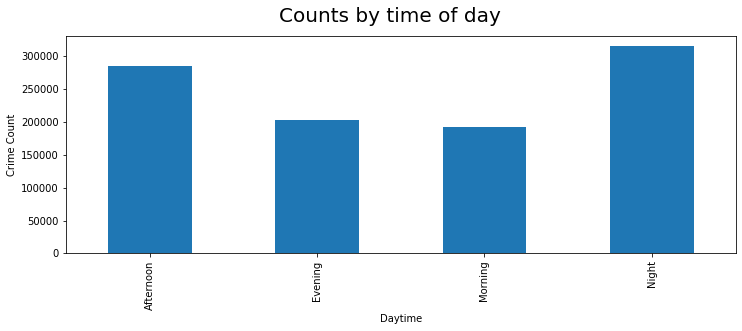

In [23]:
#Plot Counts by time of day
fig, ax = plt.subplots(figsize=(12, 4))
pivot2.plot(ax=ax, kind='bar', legend = False)
fig.suptitle('Counts by time of day', fontsize=20)
plt.ylabel('Crime Count')

In [24]:
#Crimes committed by Day time
pivot3 = pd.pivot_table(crimedf,
                      index = ['OFNS_DESC','Daytime'],
                      values = 'CMPLNT_NUM',
                      aggfunc = 'count')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pivot3)

                                                CMPLNT_NUM
OFNS_DESC                            Daytime              
ABORTION                             Evening             1
                                     Night               1
ADMINISTRATIVE CODE                  Afternoon         637
                                     Evening           456
                                     Morning           623
                                     Night             529
ADMINISTRATIVE CODES                 Evening             1
                                     Night               1
AGRICULTURE & MRKTS LAW-UNCLASSIFIED Afternoon          25
                                     Evening            16
                                     Morning            21
                                     Night              15
ALCOHOLIC BEVERAGE CONTROL LAW       Afternoon          24
                                     Evening            31
                                     Morning            

In [25]:
#Crime Type Counts
crimedf.LAW_CAT_CD.value_counts()

MISDEMEANOR    585468
FELONY         327807
VIOLATION      135300
Name: LAW_CAT_CD, dtype: int64

In [26]:
#Crime Types by day
pivot4 = pd.pivot_table(crimedf,
                      index = ['Daytime', 'LAW_CAT_CD'],
                      values = 'CMPLNT_NUM',
                      aggfunc = 'count')

pivot4

CMPLNT_NUM
Daytime   LAW_CAT_CD             
Afternoon FELONY            85331
          MISDEMEANOR      160422
          VIOLATION         40519
Evening   FELONY            59734
          MISDEMEANOR      116778
          VIOLATION         27119
Morning   FELONY            62357
          MISDEMEANOR       99718
          VIOLATION         30877
Night     FELONY           102578
          MISDEMEANOR      180529
          VIOLATION         32738

Text(0.5, 0.98, 'Crime Counts by Crime Type and Day')

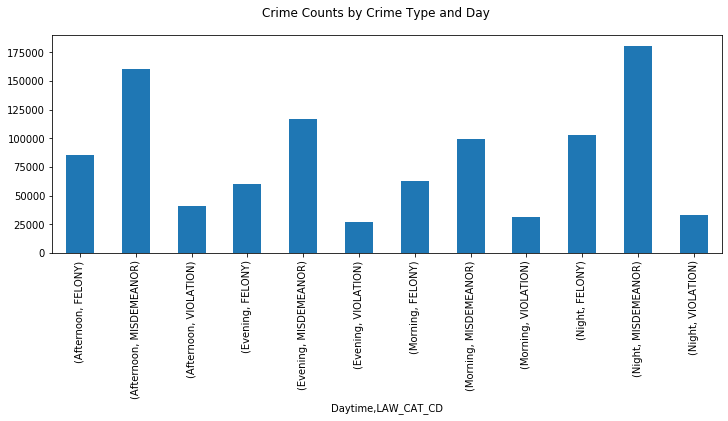

In [27]:
#Felonys happen most in the Afternoon/Night
#Misdemeanors happen most in the Afternoon/Night
#Violations happen most in the Afternoon
fig, ax = plt.subplots(figsize=(12, 4))
pivot4.plot(kind='bar', ax=ax, legend = False)
plt.suptitle('Crime Counts by Crime Type and Day')

In [28]:
#Complaints by Borough and time of day
pivot5 = pd.pivot_table(crimedf,
                      index = ['BORO_NM'],
                      values = 'CMPLNT_NUM',
                      aggfunc = 'count')

pivot6 = pd.pivot_table(crimedf,
                      index = ['Daytime', 'BORO_NM'],
                      values = 'CMPLNT_NUM',
                      aggfunc = 'count')

print(pivot5)
print(pivot6)

               CMPLNT_NUM
BORO_NM                  
BRONX              227477
BROOKLYN           315648
MANHATTAN          244749
QUEENS             211958
STATEN ISLAND       48743
                         CMPLNT_NUM
Daytime   BORO_NM                  
Afternoon BRONX               61094
          BROOKLYN            84141
          MANHATTAN           72059
          QUEENS              55046
          STATEN ISLAND       13932
Evening   BRONX               44732
          BROOKLYN            61134
          MANHATTAN           48493
          QUEENS              39988
          STATEN ISLAND        9284
Morning   BRONX               40657
          BROOKLYN            59484
          MANHATTAN           43288
          QUEENS              40347
          STATEN ISLAND        9176
Night     BRONX               70661
          BROOKLYN            94882
          MANHATTAN           70022
          QUEENS              66213
          STATEN ISLAND       14067


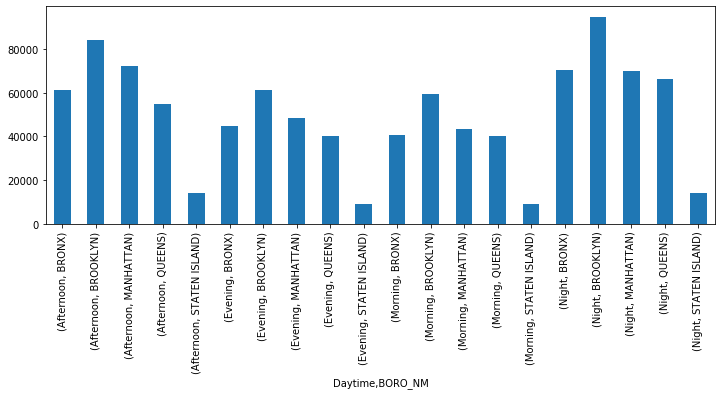

In [29]:
#Crimes per Borough
#Proves claim above that crimes usually happen in Afternoon/Evenings
fig, ax = plt.subplots(figsize=(12, 4))
pivot6.plot(ax=ax, kind='bar', legend = False)

In [30]:
crimedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CMPLNT_NUM         1048575 non-null  int64         
 1   CMPLNT_FR_DT       1048510 non-null  object        
 2   CMPLNT_FR_TM       1048575 non-null  object        
 3   CMPLNT_TO_DT       842616 non-null   object        
 4   CMPLNT_TO_TM       843002 non-null   object        
 5   RPT_DT             1048575 non-null  object        
 6   KY_CD              1048575 non-null  int64         
 7   OFNS_DESC          1045695 non-null  object        
 8   PD_CD              1047842 non-null  float64       
 9   PD_DESC            1047842 non-null  object        
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object        
 11  LAW_CAT_CD         1048575 non-null  object        
 12  JURIS_DESC         1048575 non-null  object        
 13  BORO_NM            1048575 

In [31]:
#Duration by Type of Crime
#Misdemeanors took the longest.
pivot6 = pd.pivot_table(crimedf,
                      index = ['LAW_CAT_CD', 'Duration_lbl'],
                      values = 'CMPLNT_NUM',
                      aggfunc = 'count')

pivot6

CMPLNT_NUM
LAW_CAT_CD  Duration_lbl            
FELONY      Short             203065
            Medium             32603
            Long               19097
MISDEMEANOR Short             369981
            Medium             43717
            Long               27046
VIOLATION   Short              89883
            Medium              2735
            Long                2572

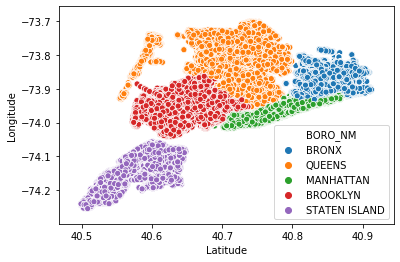

In [32]:
#Let's plot long/lat coordinates by Borough to see if we can see separation
sns.scatterplot(x="Latitude", y="Longitude", hue="BORO_NM", data=crimedf)

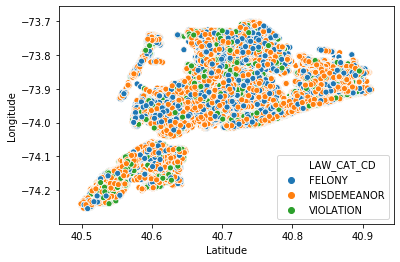

In [33]:
#Test to see any separation
sns.scatterplot(x="Latitude", y="Longitude", hue="LAW_CAT_CD", data=crimedf)

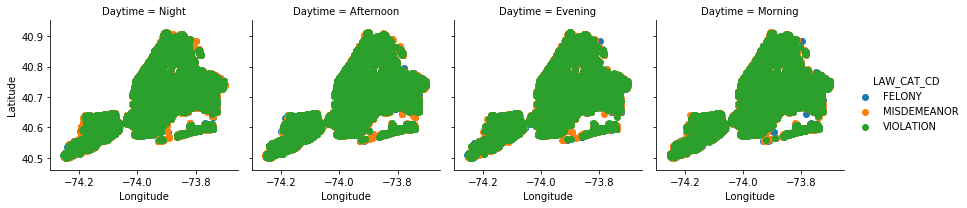

In [34]:
#Any separation of types of crime during the day in certain boroughs
g = sns.FacetGrid(crimedf, col = "Daytime", hue = "LAW_CAT_CD")
g.map(plt.scatter, "Longitude", "Latitude")
g.add_legend()

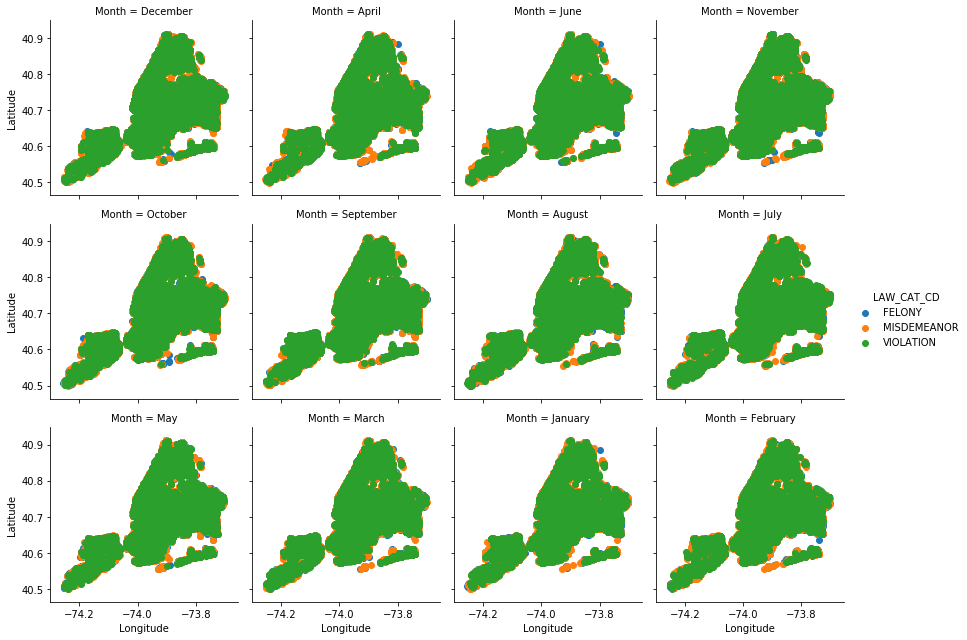

In [35]:
#Separation of crimes by month
g = sns.FacetGrid(crimedf, col = "Month", col_wrap = 4, hue = "LAW_CAT_CD")
g.map(plt.scatter, "Longitude", "Latitude")
g.add_legend()

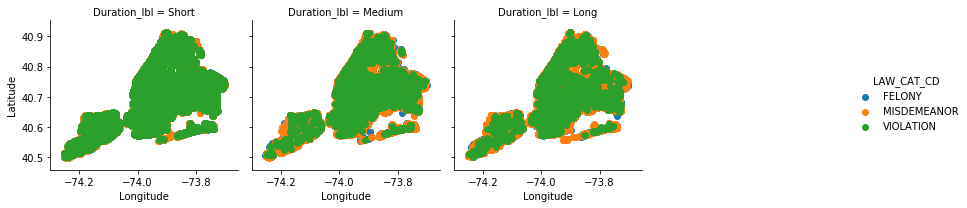

In [36]:
g = sns.FacetGrid(crimedf, col = "Duration_lbl", col_wrap = 4, hue = "LAW_CAT_CD")
g.map(plt.scatter, "Longitude", "Latitude")
g.add_legend()

Text(0.5, 1.0, 'Boxplot of Duration of Crime by Crime Type')

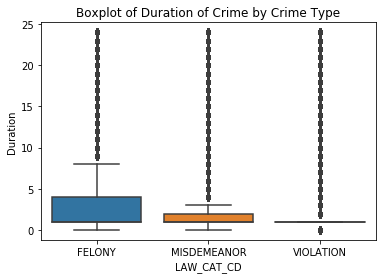

In [37]:
#Duration box plot by crime type
ax = sns.boxplot(x="LAW_CAT_CD", y="Duration", data=crimedf)
ax.set_title("Boxplot of Duration of Crime by Crime Type")

Text(0.5, 1.0, 'Boxplot of Duration of Crime by Daytime')

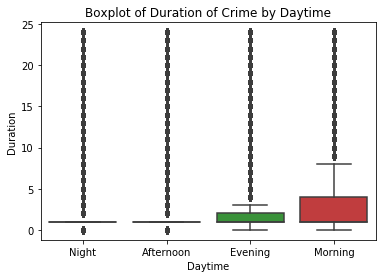

In [38]:
#Duration by time of day
ax = sns.boxplot(x="Daytime", y="Duration", data=crimedf)
ax.set_title("Boxplot of Duration of Crime by Daytime")

Text(0.5, 1.0, 'Boxplot of Duration of Crime by Borough')

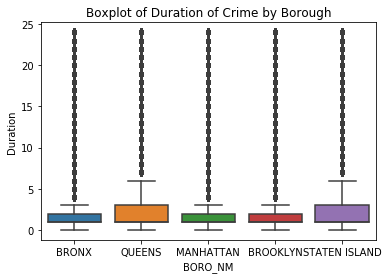

In [48]:
#Duration by Borough
ax = sns.boxplot(x="BORO_NM", y="Duration", data=crimedf)
ax.set_title("Boxplot of Duration of Crime by Borough")

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(crimedf.OFNS_DESC.value_counts())

PETIT LARCENY                           180246
HARRASSMENT 2                           133179
ASSAULT 3 & RELATED OFFENSES            114430
CRIMINAL MISCHIEF & RELATED OF          102771
GRAND LARCENY                            96232
DANGEROUS DRUGS                          56868
OFF. AGNST PUB ORD SENSBLTY &            44772
FELONY ASSAULT                           43921
ROBBERY                                  36801
BURGLARY                                 34994
MISCELLANEOUS PENAL LAW                  29221
DANGEROUS WEAPONS                        22953
OFFENSES AGAINST PUBLIC ADMINI           21353
GRAND LARCENY OF MOTOR VEHICLE           16223
INTOXICATED & IMPAIRED DRIVING           15169
VEHICLE AND TRAFFIC LAWS                 13050
SEX CRIMES                               11780
FORGERY                                  10591
THEFT-FRAUD                              10472
CRIMINAL TRESPASS                        10292
FRAUDS                                    7861
POSSESSION OF

In [16]:
#Create categorical list of all 68 possible offenses
#4 types of crime: Personal, Property, Statutory/State, and Other

#Personal - Assault, Battery, Abuse, Kidnapping, Rape, Homicide, Harrassment
personal_list = ['ASSAULT', 'BATTERY', 'MURDER', 'MANSLAUGHTER', 'HARRASSMENT', 'KIDNAPPING', 'RAPE', 'SEX', 'HOMICIDE', 'WEAPON', 'WEAPONS', 'PERSON']

#Property - Arson, Theft, Mischief, Burglary, Larceny, Robbery, Forgery, Embezzlement, Shoplifting, Trespass, Fraud/Financial
property_list = ['ARSON', 'THEFT', 'THEF', 'MISCHIEF', 'ROBBERY', 'BURGLARY', 'JOSTLING', 'TOOLS', 'FRAUD', 'FRAUDS', 'FRAUDULENT', 'LARCENY', 'FORGERY', 'STOLEN', 'UNAUTHORIZED', 'TRESPASS']

#Statutory - State-Related offenses, DUI, DWI, Gambling, Loitering, Drug, Traffic, Public Servant/Admin-related crimes
statutory_list = ['DRUGS', 'DRUG', 'SENSBLTY', 'PENAL', 'PUBLIC', 'INTOXICATED', 'TRAFFIC', 'ADMINISTRATIVE', 'GAMBLING', 'PROSTITUTION', 'ALCOHOLIC', 'DISORDERLY']

#Violent vs Non-Violent
violent = personal_list
non_violent = property_list + statutory_list

In [17]:
#Replace all Hyphons and forward slashes with spaces
def string_replace(column):
    
    newstrings = []
    
    for string in column:
        for word in string:
            if word == '-':
                newstrings.append(string.replace('-', ' '))
                break
            elif word == '/':
                newstrings.append(string.replace('/', ' '))
                break
        else:
            newstrings.append(string)
                
    
    return ''.join(newstrings)

def crime_apply(string):
    
    for word in string.split():
        if word in violent:
            return "Violent Crime"
        elif word in non_violent:
            return "Non-Violent Crime"
    else:
        pass

In [18]:
#Remove NA's before applying Algo.. only removes about 2-3k observations
crimedf = crimedf[crimedf['OFNS_DESC'].notna()] 
crimedf['OFNS_DESC'] = crimedf.apply(lambda x: string_replace(x['OFNS_DESC']), axis = 1)
crimedf['OFNS_DESC_TYPE'] = crimedf.apply(lambda x: crime_apply(x['OFNS_DESC']), axis = 1)
crimedf.head(15)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,OFNS_DESC_TYPE
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",Non-Violent Crime
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON NEGL. MANSLAUGHTER,NaN,NaN,...,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",Violent Crime
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",Non-Violent Crime
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",Violent Crime
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",Violent Crime
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,FRONT OF,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)",Violent Crime
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,OPPOSITE OF,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)",Non-Violent Crime
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,FRONT OF,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)",Violent Crime
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)",Violent Crime
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,INSIDE,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)",Non-Violent Crime


In [19]:
#Value Counts by Crime Type
crimedf['OFNS_DESC_TYPE'].value_counts()

Non-Violent Crime    710987
Violent Crime        333129
Name: OFNS_DESC_TYPE, dtype: int64